# 12 - Natural Language Processing

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 0.1, Apr 2016

## Part of the class [Practical Machine Learning](https://github.com/albahnsen/PracticalMachineLearningClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Kevin Markham](https://github.com/justmarkham)

### What is NLP?

- Using computers to process (analyze, understand, generate) natural human languages
- Most knowledge created by humans is unstructured text, and we need a way to make sense of it
- Build probabilistic model using data about a language

### What are some of the higher level task areas?

- **Information retrieval**: Find relevant results and similar results
    - [Google](https://www.google.com/)
- **Information extraction**: Structured information from unstructured documents
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation**: One language to another
    - [Google Translate](https://translate.google.com/)
- **Text simplification**: Preserve the meaning of text, but simplify the grammar and vocabulary
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input**: Faster or easier typing
    - [My application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis**: Attitude of speaker
    - [Hater News](http://haternews.herokuapp.com/)
- **Automatic summarization**: Extractive or abstractive summarization
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural Language Generation**: Generate text from data
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation**: Speech-to-text, text-to-speech
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering**: Determine the intent of the question, match query with knowledge base, evaluate hypotheses
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)
    
### What are some of the lower level components?

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"
- **Machine learning**

### Why is NLP hard?

- **Ambiguity**:
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: text messages
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"

NLP requires an understanding of the **language** and the **world**.

# Part 1: Reading text from Mashable

In [213]:
urls = ['http://mashable.com/2016/03/07/apple-ebook-case/#6KXWVluVqmqg',
        'http://mashable.com/2016/03/31/donald-trump-gaslighting-women',
        'http://mashable.com/2016/03/08/scotland-giant-rabbit-home',
        'http://mashable.com/2016/03/08/15-skills-digital-marketers',
        'http://mashable.com/2015/12/31/top-ten-movies-2015/#BMwhrISr3sqB',
        'http://mashable.com/2016/01/01/munich-terror-attack-warning/#POjevJ.v3OqD',
        'http://mashable.com/2016/01/01/natalie-cole-death/#et7PagRa3Zqh',
        'http://mashable.com/2016/01/01/camille-cosby-will-testify/#SGpnofBo3aqd',
        'http://mashable.com/2016/01/31/obama-first-visit-mosque/',
        'http://mashable.com/2016/01/31/australian-open-pics-decade/',
        'http://mashable.com/2016/01/31/k9-auction-fundraiser/',
        'http://mashable.com/2016/03/14/apple-vs-fbi-whatsapp-encryption/',
        'http://mashable.com/2016/03/10/apple-battery-life/',
        'http://mashable.com/2016/03/07/iphone-photo-editing-tips/',
        'http://mashable.com/2015/11/30/just-cause-3-review/',
        'http://mashable.com/2015/11/30/paris-holiday/',
        'http://mashable.com/2015/11/30/australia-fossil-fuel-pledge/',
        'http://mashable.com/2015/11/30/paris-holiday',
        'http://mashable.com/2015/12/01/samsung-koh-dongjin/',
        'http://mashable.com/2016/04/05/jackie-chan-kung-fu-yoga-bollywood/',
        'http://mashable.com/2015/12/01/asian-7-eleven-food/',
        'http://mashable.com/2015/12/31/5-apps-hangover-fixes/',
        'http://mashable.com/2015/12/31/latest-hillary-clinton-email-dump/',
        'http://mashable.com/2015/12/14/pu-zhiqiang-trial/',
        'http://mashable.com/2015/12/14/oukitel-k10000-15-day-battery/',
        'http://mashable.com/2016/01/13/donald-trump-mic/',
        'http://mashable.com/2016/01/14/nissan-salutes-dodge-chevy-ford-ad/',
        'http://mashable.com/2016/01/31/boko-haram-burned-children-nigeria/',
        'http://mashable.com/2016/01/31/louis-ck-show/',
        'http://mashable.com/2016/01/31/disney-princess-tim-burton/',
        'http://mashable.com/2016/02/01/tata-zica-zika-virus/',
        'http://mashable.com/2016/02/01/guess-skin-hydrating-denim/',
        'http://mashable.com/2016/02/01/human-gene-editing/',
        'http://mashable.com/2016/02/01/donald-trump-loser/',
        'http://mashable.com/2016/02/02/jaguar-land-rover-self-driving/',
        'http://mashable.com/2016/02/02/liam-neeson-super-bowl/',
        'http://mashable.com/2016/02/02/how-to-grieve-at-work/',
        'http://mashable.com/2016/02/02/donald-trump-puffer-fish/',
        'http://mashable.com/2016/02/02/virustotal-firmware-scanner/',
        'http://mashable.com/2016/02/02/sanders-supporters-conspiracy-theories/',
        'http://mashable.com/2016/02/02/somalia-plane-hole-in-side/',
        'http://mashable.com/2016/02/02/sleeping-cat-covered-in-mice/',
        'http://mashable.com/2016/02/02/suicide-squad-batman-animated-series/',
        'http://mashable.com/2016/02/03/super-bowl-kids/',
        'http://mashable.com/2016/02/11/master-of-none-season-2/',
        'http://mashable.com/2016/02/11/kanye-album-looks-like/',
        'http://mashable.com/2016/02/11/bernie-sanders-erica-garner/',
        'http://mashable.com/2016/02/11/porter-ranch-gas-leak-plugged/',
        'http://mashable.com/2016/02/12/milestone-black-superhero/',
        'http://mashable.com/2016/02/12/ohio-arts-sells-etch-a-sketch/',
        'http://mashable.com/2016/02/25/sarah-michelle-gellar-cruel-intentions-pilot/',
        'http://mashable.com/2016/02/25/new-york-hoverboard-ban-posters/',
        'http://mashable.com/2015/09/30/australia-satellite-rural-internet/',
        'http://mashable.com/2015/09/30/code-black-doctor-training/',
        'http://mashable.com/2015/10/01/tribeca-shortlist-netflix-good-movies/',
        'http://mashable.com/2015/10/01/charles-ingram-evicted-a9/',
        'http://mashable.com/2015/10/04/startups-for-mbas/',
        'http://mashable.com/2015/10/04/wheeliz-car-sharing-disabilities/',
        'http://mashable.com/2015/10/04/bird-throws-coins/',
        'http://mashable.com/2015/10/04/columbia-flood-instagram/',
        'http://mashable.com/2015/10/04/good-wife-season-7-premiere-recap/',
        'http://mashable.com/2015/10/04/last-man-on-earth-will-ferrell/',
        'http://mashable.com/2015/10/15/hotel-adult-movies/',
        'http://mashable.com/2015/10/15/hillary-clinton-wine-ice-cream/',
        'http://mashable.com/2015/10/15/pc-ipad-samsung-iphone-microsoft/',
        'http://mashable.com/2015/10/15/103-year-old-birthday-wonder-woman/',
        'http://mashable.com/2015/10/15/back-to-the-future-2015-short/',
        'http://mashable.com/2015/10/16/emoji-movie-trailer-the-soup/',
        'http://mashable.com/2015/10/16/lego-batman-rosario-dawson/',
        'http://mashable.com/2015/10/16/ford-flux-capacitor/',
        'http://mashable.com/2015/10/28/turkey-media-blackout-journalists/',
        'http://mashable.com/2015/10/28/robert-downey-jr-cystic-fibrosis/',
        'http://mashable.com/2015/10/28/country-life-gentleman/',
        'http://mashable.com/2015/10/28/emojis-youtube-videos/',
        'http://mashable.com/2015/08/31/jarryd-hayne-49ers-roster/',
        'http://mashable.com/2015/09/01/concept-fuci-smartbike/',
        'http://mashable.com/2015/09/01/american-horror-story-hotel-teasers/',
        'http://mashable.com/2015/09/17/brabus-zero-emission-tesla/',
        'http://mashable.com/2015/09/17/refugees-croatia-thousands/',
        'http://mashable.com/2015/09/17/reputation-meltdown-office/',
        'http://mashable.com/2015/09/17/google-glass-project-aura/',
        'http://mashable.com/2015/09/17/apple-steve-wozniak-ahmed-mohamed/',
        'http://mashable.com/2015/09/30/gap-pace-brandspeak/',
        'http://mashable.com/2015/09/30/private-jets-to-cuba/',
        'http://mashable.com/2015/09/30/chinas-glass-bottomed-suspension-bridge/'
       ]

In [214]:
len(urls)

85

In [39]:
# Extract text and other info (From previous class)
from bs4 import BeautifulSoup
import urllib.request

def news_info(url):
    # Download HTML
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')
    
    # Title, author, text
    title = soup.title.string
    
    author = soup.find_all("span", { "class" : "author_name"})
    # If author is empty try this:
    if author == []:
        author = soup.find_all("span", { "class" : "byline basic"})
    author = str(author).split('>')[1].split('By ')[1].split('<')[0]
    
    # Number of shares
    shares = soup.find_all("div", { "class" : "total-shares"})
    try:
        shares = str(shares).split('<em>')[1].split('</em>')[0]
    except IndexError:
        shares = str(shares).split('<em class="minimal">')[1].split('</em>')[0]

    if 'k' in shares:
        shares = shares[:-1]
        shares = shares.replace('.', '') + '00'
    
    # Get text
    try:
        text = str(soup.get_text()).split("UTC\n\n\n")[1]
    except IndexError:
        text = str(soup.get_text()).split("Analysis\n\n")[1]
        
    text = text.split('Have something to add to this story?')[0]
    
    author_web = soup.find_all("a", { "class" : "byline"})
    if author_web != []:
        author_web = 'http://mashable.com' + str(author_web).split('href="')[1].split('">')[0]
    
        # Author networks
        author_networks = {'facebo': '',
                           'linked': '',
                           'twitte': '',
                           'google': ''}

        response = urllib.request.urlopen(author_web)
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')

        networks = str(soup.find_all("div", { "class" : "profile-networks"})).replace('network-badge-round', '').split('network-badge-')

        for network in networks:
            if network[:6] in author_networks.keys():
                author_networks[network[:6]] = network.split('href="')[1].split('" target')[0]

        # Author twitter followers
        author_networks['twitter_followers'] = 0
        if author_networks['twitte'] != '':

            response = urllib.request.urlopen(author_networks['twitte'])
            html = response.read()
            soup = BeautifulSoup(html, 'html.parser')

            followers = str(soup.find_all("span", { "class" : "ProfileNav-value"})[2]).split('">')[1]
            if ('K' in followers) or ('mil' in followers):
                followers = followers.split('\xa0')[0]
                if ',' in followers:
                    followers = followers.replace(',', '') + '00'
                else:
                    followers = followers + '000'
            else:
                followers = followers.split('</span')[0].replace('.', '')

            author_networks['twitter_followers'] = int(followers)
        
    else:
        author_networks = {'facebo': '',
                           'linked': '',
                           'twitte': '',
                           'google': '', 
                           'twitter_followers': 0}
        
    return {'title': title, 'author': author, 'shares': shares, 
            'author_web': author_web, 'text':text, 
            'author_networks': author_networks}        

In [ ]:
data = []

In [232]:
for url in urls:
    try:
        data.append(news_info(url))
    except:
        pass

In [233]:
len(data)

82

In [8]:
import pandas as pd

In [234]:
df = pd.DataFrame.from_records(data)

In [235]:
df = pd.merge(df, pd.DataFrame.from_records(df.author_networks.tolist()), left_index=True, right_index=True)

In [236]:
df.drop('author_networks', axis=1, inplace=True)

In [237]:
df.to_csv('12_mashable_texts.csv')

In [238]:
df.head()

,author,author_web,shares,text,title,facebo,google,linked,twitte,twitter_followers
0,Seth Fiegerman,http://mashable.com/people/seth-fiegerman/,4900,\nApple's long and controversial ebook case ha...,The Supreme Court smacked down Apple today,http://www.facebook.com/sfiegerman,,http://www.linkedin.com/in/sfiegerman,https://twitter.com/sfiegerman,14300
1,Rebecca Ruiz,http://mashable.com/people/rebecca-ruiz/,1900,Analysis\n\n\n\n\n\nThere is a reason that Don...,Every woman has met a man like Donald Trump,,,,https://twitter.com/rebecca_ruiz,3738
2,Davina Merchant,http://mashable.com/people/568bdab351984019310...,7000,LONDON - Last month we reported on a dog-sized...,Adorable dog-sized rabbit finally finds his fo...,,https://plus.google.com/105525238342980116477?...,,,0
3,Scott Gerber,[],5000,Today's digital marketing experts must have a ...,15 essential skills all digital marketing hire...,,,,,0
4,Josh Dickey,http://mashable.com/people/joshdickey/,1600,"LOS ANGELES — For big, fun, populist popcorn m...",Mashable top 10: 'The Force Awakens' is the be...,,https://plus.google.com/109213469090692520544?...,,https://twitter.com/JLDlite,11200


# Part 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [239]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [240]:
df = pd.read_csv('12_mashable_texts.csv', index_col=0)

### Create the target feature (number of shares)

In [241]:
y = df.shares
y.describe()

count       82.000000
mean      3090.487805
std       8782.031594
min        437.000000
25%        893.500000
50%       1200.000000
75%       2275.000000
max      63100.000000
Name: shares, dtype: float64

In [255]:
y = pd.cut(y, [0, 893, 1200, 2275, 63200], labels=[0, 1, 2, 3])

In [256]:
y.value_counts()

1    22
3    21
0    21
2    18
dtype: int64

In [258]:
df['y'] = y

### create document-term matrices 

In [259]:
X = df.text

In [260]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [261]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_dtm.shape

(82, 7969)

In [262]:
# last 50 features
print(vect.get_feature_names()[-150:-100])

['ydwnm50jlu', 'ye', 'yeah', 'year', 'years', 'yec', 'yeezy', 'yellow', 'yelp', 'yep', 'yes', 'yesterday', 'yesweather', 'yet', 'yoga', 'yong', 'york', 'you', 'young', 'younger', 'youngest', 'your', 'yourself', 'youth', 'youtube', 'youtubeduck', 'yup', 'yuyuan', 'yücel', 'zach', 'zaxoqbv487', 'zero', 'zgkymde1lzewlza0l2zkl1n0yxj0dxayljq0mdvhlmpwzwpwcxrodw1ictexnxgxmtujcmujanbn', 'zgkymde1lzewlza0l2zkl1n0yxj0dxayljq0mdvhlmpwzwpwcxrodw1icteymdb4nji3iwplcwpwzw', 'zgkymde1lzewlza0l2zkl1n0yxj0dxayljq0mdvhlmpwzwpwcxrodw1icti4ohgxnjijcmujanbn', 'zgkymde1lzewlza0l2zkl1n0yxj0dxayljq0mdvhlmpwzwpwcxrodw1ictk1mhg1mzqjcmujanbn', 'zgkymde1lzewlza0l2zkl1n0yxj0dxayljq0mdvhlmpwzwpwcxrodw1ictu2mhg3ntakzqlqcgc', 'zgkymde1lzewlza0l2zkl1n0yxj0dxayljq0mdvhlmpwzwpwcxrodw1ictywmhgzmzgjcmujanbn', 'zgkymde1lzewlza0lzm1l2jpcmrfdgfudhj1lmu3zwmzlmpwzwpwcxrodw1ictexnxgxmtujcmujanbn', 'zgkymde1lzewlza0lzm1l2jpcmrfdgfudhj1lmu3zwmzlmpwzwpwcxrodw1icteymdb4nji3iwplcwpwzw', 'zgkymde1lzewlza0lzm1l2jpcmrfdgfudhj1lmu3zwmzlm

In [263]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [264]:
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(82, 8759)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [265]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_dtm = vect.fit_transform(X)
X_dtm.shape

(82, 37905)

In [266]:
# last 50 features
print(vect.get_feature_names()[-1000:-950])

['with white', 'with win', 'with wine', 'with wiretap', 'with working', 'with younger', 'with your', 'witherspoon', 'witherspoon is', 'witherspoon will', 'within', 'within the', 'without', 'without bitterness', 'without buying', 'without clear', 'without explicit', 'without fight', 'without flexibility', 'without generating', 'without getting', 'without having', 'without its', 'without meeting', 'without needing', 'without positive', 'without proper', 'without single', 'without the', 'without touching', 'without trial', 'witness', 'witness says', 'wobble_d_whop', 'wobble_d_whop january', 'woes', 'woes on', 'woke', 'woke up', 'woman', 'woman campaign', 'woman for', 'woman if', 'woman image_src', 'woman in', 'woman is', 'woman og', 'woman the', 'woman to', 'woman twitter']


### Predict shares

In [267]:
# Default CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.420094
std       0.117514
min       0.250000
25%       0.366477
50%       0.409722
75%       0.500000
max       0.571429
dtype: float64

In [268]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())

In [269]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  37905
count    10.000000
mean      0.405808
std       0.087028
min       0.250000
25%       0.375000
50%       0.375000
75%       0.440476
max       0.571429
dtype: float64


# Part 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text



- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [270]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  7710
count    10.000000
mean      0.355411
std       0.085808
min       0.250000
25%       0.270833
50%       0.369318
75%       0.415179
max       0.500000
dtype: float64


In [271]:
# set of stop words
print(vect.get_stop_words())

frozenset({'our', 'when', 'perhaps', 'same', 'whereby', 'will', 'co', 'un', 'has', 'under', 'take', 'among', 'an', 'a', 'becomes', 'fill', 'again', 'herself', 'nobody', 'sometimes', 'per', 'except', 'fify', 'her', 'hereafter', 'now', 'to', 'off', 'must', 'myself', 'such', 'noone', 'them', 'once', 'by', 'your', 'his', 'into', 'either', 'latter', 'most', 'whereas', 'mine', 'amoungst', 'there', 'rather', 'every', 'anywhere', 'never', 'for', 'or', 'few', 'afterwards', 'at', 'system', 'nothing', 'however', 'con', 'detail', 'call', 'well', 'another', 'hence', 'please', 'hers', 'twelve', 'being', 'least', 'what', 'whereupon', 'several', 'toward', 'done', 'further', 'only', 'whenever', 'beside', 'everything', 'ten', 'first', 'whence', 'beforehand', 'than', 'eight', 'which', 'sixty', 'together', 'themselves', 'own', 'that', 'during', 'yourself', 'almost', 'seem', 'throughout', 'wherein', 'describe', 'twenty', 'of', 'i', 'nine', 'everywhere', 'whoever', 'bill', 'hereby', 'do', 'seems', 'these', 

# Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [272]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
count    10.000000
mean      0.375126
std       0.168480
min       0.125000
25%       0.250000
50%       0.401786
75%       0.486111
max       0.625000
dtype: float64


In [273]:
# all 100 features
print(vect.get_feature_names())

['01', '10', '11', '15', '1cd', '2015', '2016', '28', 'article', 'australian', 'author', 'best', 'big', 'business', 'campaign', 'com', 'company', 'conversion', 'cystic', 'daniel', 'day', 'description', 'digital', 'don', 'downey', 'entertainment', 'facebook', 'false', 'fibrosis', 'function', 'good', 'hot', 'http', 'https', 'image', 'initpage', 'instagram', 'internal', 'iron', 'jpg', 'jr', 'js', 'just', 'know', 'life', 'like', 'make', 'man', 'marketing', 'mashable', 'media', 'movie', 'movies', 'mshcdn', 'new', 'null', 'oct', 'og', 'old', 'open', 'paris', 'people', 'photo', 'pic', 'platform', 'police', 'posted', 'premiere', 'pu', 'rack', 'rdj', 'return', 'rights', 'rising', 'robert', 'said', 'sailthru', 'says', 'season', 'short_url', 'state', 'time', 'timer', 'title', 'topics', 'travel', 'true', 'trump', 'twitter', 'twttr', 'uncategorized', 'url', 've', 'watercooler', 'way', 'window', 'work', 'world', 'year', 'years']


In [274]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000)
tokenize_test(vect)

Features:  1000
count    10.000000
mean      0.405574
std       0.130813
min       0.250000
25%       0.270833
50%       0.414773
75%       0.500000
max       0.571429
dtype: float64


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [275]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  7620
count    10.000000
mean      0.407594
std       0.141763
min       0.125000
25%       0.366477
50%       0.409722
75%       0.500000
max       0.571429
dtype: float64


# Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [276]:
!pip install textblob

In [154]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/al/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/al/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/al/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/al/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /home/al/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /home/al/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [277]:
from textblob import TextBlob, Word

In [278]:
# print the first text
print(X[0][0:1000])


Apple's long and controversial ebook case has reached its final chapter — and it's not the happy ending the company wanted.
The Supreme Court on Monday rejected an appeal filed by Apple to overturn a stinging ruling that it led a broad conspiracy with several major publishers to fix the price of e-books sold through its online bookstore.
The court's decision means Apple now has no choice but to pay out $400 million to consumers and an additional $50 million in legal fees, according to the original settlement in 2014.
SEE ALSO: Here's how Apple marshalled the entire tech industry in its fight with the FBI
For Apple, the final verdict is more damaging to its reputation as a consumer-friendly brand, not to mention the legacy of its beloved founder Steve Jobs, than to its actual bottom line.
To put the fine in context, the total $450 million payout is equal to about a little more than half the sales Apple generates on average each day, based on the $75.9 billion in revenue it reported in 

In [279]:
# save it as a TextBlob object
review = TextBlob(X[0])

In [280]:
# list the words
review.words[0:50]

WordList(['Apple', "'s", 'long', 'and', 'controversial', 'ebook', 'case', 'has', 'reached', 'its', 'final', 'chapter', '—', 'and', 'it', "'s", 'not', 'the', 'happy', 'ending', 'the', 'company', 'wanted', 'The', 'Supreme', 'Court', 'on', 'Monday', 'rejected', 'an', 'appeal', 'filed', 'by', 'Apple', 'to', 'overturn', 'a', 'stinging', 'ruling', 'that', 'it', 'led', 'a', 'broad', 'conspiracy', 'with', 'several', 'major', 'publishers', 'to'])

In [281]:
# list the sentences
review.sentences[0:5]

[Sentence("
 Apple's long and controversial ebook case has reached its final chapter — and it's not the happy ending the company wanted."),
 Sentence("The Supreme Court on Monday rejected an appeal filed by Apple to overturn a stinging ruling that it led a broad conspiracy with several major publishers to fix the price of e-books sold through its online bookstore."),
 Sentence("The court's decision means Apple now has no choice but to pay out $400 million to consumers and an additional $50 million in legal fees, according to the original settlement in 2014."),
 Sentence("SEE ALSO: Here's how Apple marshalled the entire tech industry in its fight with the FBI
 For Apple, the final verdict is more damaging to its reputation as a consumer-friendly brand, not to mention the legacy of its beloved founder Steve Jobs, than to its actual bottom line."),
 Sentence("To put the fine in context, the total $450 million payout is equal to about a little more than half the sales Apple generates on av

In [282]:
# some string methods are available
review.lower()[0:1000]

TextBlob("
apple's long and controversial ebook case has reached its final chapter — and it's not the happy ending the company wanted.
the supreme court on monday rejected an appeal filed by apple to overturn a stinging ruling that it led a broad conspiracy with several major publishers to fix the price of e-books sold through its online bookstore.
the court's decision means apple now has no choice but to pay out $400 million to consumers and an additional $50 million in legal fees, according to the original settlement in 2014.
see also: here's how apple marshalled the entire tech industry in its fight with the fbi
for apple, the final verdict is more damaging to its reputation as a consumer-friendly brand, not to mention the legacy of its beloved founder steve jobs, than to its actual bottom line.
to put the fine in context, the total $450 million payout is equal to about a little more than half the sales apple generates on average each day, based on the $75.9 billion in revenue it re

# Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [283]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print([stemmer.stem(word) for word in review.words])

['appl', "'s", 'long', 'and', 'controversi', 'ebook', 'case', 'has', 'reach', 'it', 'final', 'chapter', '—', 'and', 'it', "'s", 'not', 'the', 'happi', 'end', 'the', 'compani', 'want', 'the', 'suprem', 'court', 'on', 'monday', 'reject', 'an', 'appeal', 'file', 'by', 'appl', 'to', 'overturn', 'a', 'sting', 'rule', 'that', 'it', 'led', 'a', 'broad', 'conspiraci', 'with', 'sever', 'major', 'publish', 'to', 'fix', 'the', 'price', 'of', 'e-book', 'sold', 'through', 'it', 'onlin', 'bookstor', 'the', 'court', "'s", 'decis', 'mean', 'appl', 'now', 'has', 'no', 'choic', 'but', 'to', 'pay', 'out', '400', 'million', 'to', 'consum', 'and', 'an', 'addit', '50', 'million', 'in', 'legal', 'fee', 'accord', 'to', 'the', 'origin', 'settlement', 'in', '2014', 'see', 'also', 'here', "'s", 'how', 'appl', 'marshal', 'the', 'entir', 'tech', 'industri', 'in', 'it', 'fight', 'with', 'the', 'fbi', 'for', 'appl', 'the', 'final', 'verdict', 'is', 'more', 'damag', 'to', 'it', 'reput', 'as', 'a', 'consumer-friend', 

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [284]:
# assume every word is a noun
print([word.lemmatize() for word in review.words])

['Apple', "'s", 'long', 'and', 'controversial', 'ebook', 'case', 'ha', 'reached', 'it', 'final', 'chapter', '—', 'and', 'it', "'s", 'not', 'the', 'happy', 'ending', 'the', 'company', 'wanted', 'The', 'Supreme', 'Court', 'on', 'Monday', 'rejected', 'an', 'appeal', 'filed', 'by', 'Apple', 'to', 'overturn', 'a', 'stinging', 'ruling', 'that', 'it', 'led', 'a', 'broad', 'conspiracy', 'with', 'several', 'major', 'publisher', 'to', 'fix', 'the', 'price', 'of', 'e-books', 'sold', 'through', 'it', 'online', 'bookstore', 'The', 'court', "'s", 'decision', 'mean', 'Apple', 'now', 'ha', 'no', 'choice', 'but', 'to', 'pay', 'out', '400', 'million', 'to', 'consumer', 'and', 'an', 'additional', '50', 'million', 'in', 'legal', 'fee', 'according', 'to', 'the', 'original', 'settlement', 'in', '2014', 'SEE', 'ALSO', 'Here', "'s", 'how', 'Apple', 'marshalled', 'the', 'entire', 'tech', 'industry', 'in', 'it', 'fight', 'with', 'the', 'FBI', 'For', 'Apple', 'the', 'final', 'verdict', 'is', 'more', 'damaging', 

In [285]:
# assume every word is a verb
print([word.lemmatize(pos='v') for word in review.words])

['Apple', "'s", 'long', 'and', 'controversial', 'ebook', 'case', 'have', 'reach', 'its', 'final', 'chapter', '—', 'and', 'it', "'s", 'not', 'the', 'happy', 'end', 'the', 'company', 'want', 'The', 'Supreme', 'Court', 'on', 'Monday', 'reject', 'an', 'appeal', 'file', 'by', 'Apple', 'to', 'overturn', 'a', 'sting', 'rule', 'that', 'it', 'lead', 'a', 'broad', 'conspiracy', 'with', 'several', 'major', 'publishers', 'to', 'fix', 'the', 'price', 'of', 'e-books', 'sell', 'through', 'its', 'online', 'bookstore', 'The', 'court', "'s", 'decision', 'mean', 'Apple', 'now', 'have', 'no', 'choice', 'but', 'to', 'pay', 'out', '400', 'million', 'to', 'consumers', 'and', 'an', 'additional', '50', 'million', 'in', 'legal', 'fee', 'accord', 'to', 'the', 'original', 'settlement', 'in', '2014', 'SEE', 'ALSO', 'Here', "'s", 'how', 'Apple', 'marshal', 'the', 'entire', 'tech', 'industry', 'in', 'its', 'fight', 'with', 'the', 'FBI', 'For', 'Apple', 'the', 'final', 'verdict', 'be', 'more', 'damage', 'to', 'its', 

In [286]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [287]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  7628
count    10.000000
mean      0.405808
std       0.105100
min       0.250000
25%       0.366477
50%       0.401786
75%       0.486111
max       0.571429
dtype: float64


# Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [288]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [289]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [290]:
# Document Frequency
vect = CountVectorizer(binary=True)
df_ = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df_.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [291]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df_

,cab,call,me,please,tonight,you
0,0,0.333333,0.0,0,1,1
1,1,0.333333,0.5,0,0,0
2,0,0.333333,0.5,2,0,0


In [292]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

# Part 8: Using TF-IDF to Summarize a text


In [293]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X)
features = vect.get_feature_names()
dtm.shape

(82, 7710)

In [294]:
# choose a random text
review_id = 40
review_text = X[review_id]
review_length = len(review_text)

In [295]:
# create a dictionary of words and their TF-IDF scores
word_scores = {}
for word in TextBlob(review_text).words:
    word = word.lower()
    if word in features:
        word_scores[word] = dtm[review_id, features.index(word)]

In [296]:
# print words with the top 5 TF-IDF scores
print('TOP SCORING WORDS:')
top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
for word, score in top_scores:
    print(word)

TOP SCORING WORDS:
sanders
iowa
precinct
coin
moines


In [297]:
# print 5 random words
print('\n' + 'RANDOM WORDS:')
random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
for word in random_words:
    print(word)


RANDOM WORDS:
dollars
pitching
eventually
senator
edged


# Part 9: Sentiment Analysis

In [298]:
print(review[0:1000])


Apple's long and controversial ebook case has reached its final chapter — and it's not the happy ending the company wanted.
The Supreme Court on Monday rejected an appeal filed by Apple to overturn a stinging ruling that it led a broad conspiracy with several major publishers to fix the price of e-books sold through its online bookstore.
The court's decision means Apple now has no choice but to pay out $400 million to consumers and an additional $50 million in legal fees, according to the original settlement in 2014.
SEE ALSO: Here's how Apple marshalled the entire tech industry in its fight with the FBI
For Apple, the final verdict is more damaging to its reputation as a consumer-friendly brand, not to mention the legacy of its beloved founder Steve Jobs, than to its actual bottom line.
To put the fine in context, the total $450 million payout is equal to about a little more than half the sales Apple generates on average each day, based on the $75.9 billion in revenue it reported in 

In [299]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.11156714200831849

In [300]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [301]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
df['sentiment'] = df['text'].apply(detect_sentiment)

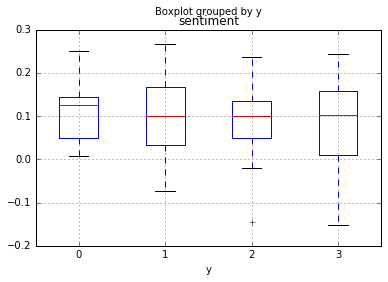

In [302]:
# box plot of sentiment grouped by stars
df.boxplot(column='sentiment', by='y')

In [303]:
# text with most positive sentiment
df[df.sentiment >= df.sentiment.quantile(q=0.75)].text.head()

3     Today's digital marketing experts must have a ...
6     LOS ANGELES — Natalie Cole, the accomplished R...
11    As the battle between Apple and the FBI heats ...
12    If you're still painstakingly killing all your...
13    \nApple's annual World Gallery showcases some ...
Name: text, dtype: object

In [304]:
# reviews with most negative sentiment
df[df.sentiment <= df.sentiment.quantile(q=0.25)].text.head()

1     Analysis\n\n\n\n\n\nThere is a reason that Don...
15    Since the Nov. 13 terrorist attacks in Paris, ...
17    Since the Nov. 13 terrorist attacks in Paris, ...
18    SEOUL, South Korea — Samsung appointed a new m...
23    Updated December 14, 4:50 AM ET with tweet on ...
Name: text, dtype: object

# Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible